In [2]:
!pip install chart_studio
!pip install windrose
import numpy as np
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from windrose import WindroseAxes
import os

%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
os.chdir(r'C:\Users\vigne\Desktop\WORK\DATASETS')

In [4]:
df=pd.read_csv('Turbine_Data_Kelmarsh_1.csv', skiprows=9)

In [5]:
df.head()

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
0,2020-01-01 00:00:00,3.887291,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,2.894442,5.923776,...,30.390030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01 00:10:00,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,3.387660,5.713417,...,32.042564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 00:20:00,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,3.305274,6.688592,...,32.799056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01 00:30:00,3.330342,0.689929,1.541864,4.689322,7.1,3.584192,0.524914,2.547872,4.671783,...,36.129912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01 00:40:00,3.388536,0.897104,1.832924,5.210185,7.1,3.668500,0.885085,1.908008,5.278419,...,26.667582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
turbine_no="T1"

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Columns: 299 entries, # Date and time to Tower Acceleration Y, StdDev (mm/ss)
dtypes: float64(294), int64(4), object(1)
memory usage: 120.2+ MB


In [8]:
df_T=df.copy()

In [9]:
df_T.rename(columns={'LV ActivePower (kW)':'ActivePower(kW)',"Wind Speed (m/s)":"WindSpeed(m/s)","Wind Direction (°)":"Wind_Direction"},
                inplace=True)
df_T.head()

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
0,2020-01-01 00:00:00,3.887291,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,2.894442,5.923776,...,30.390030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01 00:10:00,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,3.387660,5.713417,...,32.042564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 00:20:00,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,3.305274,6.688592,...,32.799056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01 00:30:00,3.330342,0.689929,1.541864,4.689322,7.1,3.584192,0.524914,2.547872,4.671783,...,36.129912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01 00:40:00,3.388536,0.897104,1.832924,5.210185,7.1,3.668500,0.885085,1.908008,5.278419,...,26.667582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_T.rename(columns={'Date/Time':'Time'},inplace=True)
df_T.head()

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
0,2020-01-01 00:00:00,3.887291,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,2.894442,5.923776,...,30.390030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01 00:10:00,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,3.387660,5.713417,...,32.042564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 00:20:00,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,3.305274,6.688592,...,32.799056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01 00:30:00,3.330342,0.689929,1.541864,4.689322,7.1,3.584192,0.524914,2.547872,4.671783,...,36.129912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01 00:40:00,3.388536,0.897104,1.832924,5.210185,7.1,3.668500,0.885085,1.908008,5.278419,...,26.667582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#function for finding months
def find_month(x):
    if " 01 " in x:
        return "Jan"
    elif " 02 " in x:
        return "Feb"
    elif " 03 " in x:
        return "March"    
    elif " 04 " in x:
        return "April"    
    elif " 05 " in x:
        return "May"    
    elif " 06 " in x:
        return "June"    
    elif " 07 " in x:
        return "July"    
    elif " 08 " in x:
        return "August"    
    elif " 09 " in x:
        return "Sep"    
    elif " 10 " in x:
        return "Oct"    
    elif " 11 " in x:
        return "Nov"    
    else:
        return "Dec"

In [12]:
df_T['Month'] = df_T['# Date and time'].apply(find_month)

In [13]:
df_T.Month.unique()

array(['Dec'], dtype=object)

In [14]:
df_T.head()

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)",Month
0,2020-01-01 00:00:00,3.887291,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,2.894442,5.923776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec
1,2020-01-01 00:10:00,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,3.387660,5.713417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec
2,2020-01-01 00:20:00,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,3.305274,6.688592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec
3,2020-01-01 00:30:00,3.330342,0.689929,1.541864,4.689322,7.1,3.584192,0.524914,2.547872,4.671783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec
4,2020-01-01 00:40:00,3.388536,0.897104,1.832924,5.210185,7.1,3.668500,0.885085,1.908008,5.278419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec


In [15]:
#function for rewriting wind speed for 0.5 intervals. 
#For example: wind speeds between 3.25 and 3.75 turns 3.5,wind speeds between 3.75 and 4.25 turns 4.0
def mean_speed(x):
    list=[]
    i=0.25
    while i<=25.5:
        list.append(i)
        i+=0.5
        
    for i in list:
        if x < i:
            x=i-0.25
            return x

In [16]:
#adding a new column as "mean_WindSpeed" with function mean_speed().
df_T["mean_WindSpeed"]=df_T["Wind speed (m/s)"].apply(mean_speed)
df_T.head()

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,"Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)",Month,mean_WindSpeed
0,2020-01-01 00:00:00,3.887291,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,2.894442,5.923776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,4.0
1,2020-01-01 00:10:00,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,3.387660,5.713417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,4.0
2,2020-01-01 00:20:00,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,3.305274,6.688592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,4.0
3,2020-01-01 00:30:00,3.330342,0.689929,1.541864,4.689322,7.1,3.584192,0.524914,2.547872,4.671783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,3.5
4,2020-01-01 00:40:00,3.388536,0.897104,1.832924,5.210185,7.1,3.668500,0.885085,1.908008,5.278419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,3.5


In [17]:
#function for rewriting wind direction for 30 intervals. 
#For example: wind directions between 15 and 45 turns 30,wind speeds between 45 and 75 turns 60
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [18]:
#adding a new column as "mean_Direction" with function mean_direction().
#df_T["mean_Direction"]=df_T["Wind direction, Minimum (Â°)"].apply(mean_direction)
#df_T["mean_Direction"] = df_T["Wind direction, Standard deviation (Â°)"].apply(mean_direction)
df_T["mean_Direction"] = df_T["Wind direction, Standard deviation (°)"].apply(mean_direction)
df_T.head()

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,"Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)",Month,mean_WindSpeed,mean_Direction
0,2020-01-01 00:00:00,3.887291,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,2.894442,5.923776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,4.0,0.0
1,2020-01-01 00:10:00,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,3.387660,5.713417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,4.0,0.0
2,2020-01-01 00:20:00,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,3.305274,6.688592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,4.0,0.0
3,2020-01-01 00:30:00,3.330342,0.689929,1.541864,4.689322,7.1,3.584192,0.524914,2.547872,4.671783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,3.5,0.0
4,2020-01-01 00:40:00,3.388536,0.897104,1.832924,5.210185,7.1,3.668500,0.885085,1.908008,5.278419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dec,3.5,30.0


In [19]:
print(df_T.columns)

Index(['# Date and time', 'Wind speed (m/s)',
       'Wind speed, Standard deviation (m/s)', 'Wind speed, Minimum (m/s)',
       'Wind speed, Maximum (m/s)', 'Long Term Wind (m/s)',
       'Wind speed Sensor 1 (m/s)',
       'Wind speed Sensor 1, Standard deviation (m/s)',
       'Wind speed Sensor 1, Minimum (m/s)',
       'Wind speed Sensor 1, Maximum (m/s)',
       ...
       'Tower Acceleration Y, Min (mm/ss)',
       'Tower Acceleration Y, Max (mm/ss)',
       'Drive train acceleration, Max (mm/ss)',
       'Drive train acceleration, Min (mm/ss)',
       'Drive train acceleration, StdDev (mm/ss)',
       'Tower Acceleration X, StdDev (mm/ss)',
       'Tower Acceleration Y, StdDev (mm/ss)', 'Month', 'mean_WindSpeed',
       'mean_Direction'],
      dtype='object', length=302)


In [20]:
print(df_T.head())

       # Date and time  Wind speed (m/s)  \
0  2020-01-01 00:00:00          3.887291   
1  2020-01-01 00:10:00          3.848941   
2  2020-01-01 00:20:00          4.043625   
3  2020-01-01 00:30:00          3.330342   
4  2020-01-01 00:40:00          3.388536   

   Wind speed, Standard deviation (m/s)  Wind speed, Minimum (m/s)  \
0                              0.646663                   2.629255   
1                              0.787454                   2.456995   
2                              0.983279                   2.726894   
3                              0.689929                   1.541864   
4                              0.897104                   1.832924   

   Wind speed, Maximum (m/s)  Long Term Wind (m/s)  Wind speed Sensor 1 (m/s)  \
0                   5.138163                   7.1                   4.390778   
1                   5.551735                   7.1                   4.216298   
2                   6.251913                   7.1                   4.

In [21]:
#function for rewriting wind direction with letters. 
#For example: 0=N, 30=NNE 60=NEE etc.
def find_direction(x):
    if x==0:
        return "N"
    if x==30:
        return "NNE"
    if x==60:
        return "NEE" 
    if x==90:
        return "E" 
    if x==120:
        return "SEE" 
    if x==150:
        return "SSE" 
    if x==180:
        return "S" 
    if x==210:
        return "SSW" 
    if x==240:
        return "SWW" 
    if x==270:
        return "W" 
    if x==300:
        return "NWW" 
    if x==330:
        return "NNW"

In [22]:
#adding a new column as "Direction" with function find_direction().
df_T["Direction"]=df_T["mean_Direction"].apply(find_direction)
df_T.head()

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,"Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)",Month,mean_WindSpeed,mean_Direction,Direction
0,2020-01-01 00:00:00,3.887291,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,2.894442,5.923776,...,NaN,NaN,NaN,NaN,NaN,NaN,Dec,4.0,0.0,N
1,2020-01-01 00:10:00,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,3.387660,5.713417,...,NaN,NaN,NaN,NaN,NaN,NaN,Dec,4.0,0.0,N
2,2020-01-01 00:20:00,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,3.305274,6.688592,...,NaN,NaN,NaN,NaN,NaN,NaN,Dec,4.0,0.0,N
3,2020-01-01 00:30:00,3.330342,0.689929,1.541864,4.689322,7.1,3.584192,0.524914,2.547872,4.671783,...,NaN,NaN,NaN,NaN,NaN,NaN,Dec,3.5,0.0,N
4,2020-01-01 00:40:00,3.388536,0.897104,1.832924,5.210185,7.1,3.668500,0.885085,1.908008,5.278419,...,NaN,NaN,NaN,NaN,NaN,NaN,Dec,3.5,30.0,NNE


In [23]:
#Number of wind speed values between 3.5 and 25. 
len(df_T["Wind speed (m/s)"][(df_T["Wind speed (m/s)"]>3.5) & (df_T["Wind speed (m/s)"]<=25)])

43684

In [24]:
#Values bigger than 25. 
df_T["Wind speed (m/s)"][df_T["Wind speed (m/s)"]>22].value_counts()

Wind speed (m/s)
22.419562    1
Name: count, dtype: int64

In [25]:
#Remove the data that wind speed is smaller than 3.5 and bigger than 25.5
#We do that because according to turbine power curve turbine works between these values.
df1_T=df_T[(df_T["Wind speed (m/s)"]>3.5) & (df_T["Wind speed (m/s)"]<=22.5)]

In [26]:
#Number of values where wind speed is bigger than 3.5 and active power is zero. 
#If wind speed is bigger than 3.5 and active power is zero, this means turbine is out of order. we must eliminate these.
len(df1_T["Potential power reference turbines (kW)"][(df1_T["Potential power reference turbines (kW)"]==0)&(df_T["Wind speed (m/s)"]>3.5)])

14

In [27]:
#Eliminate datas where wind speed is bigger than 3.5 and active power is zero.]=
df2_T=df1_T[((df1_T["Potential power reference turbines (kW)"]!=0)&(df1_T["Wind speed (m/s)"]>3.5)) | (df1_T["Wind speed (m/s)"]<=3.5)]

In [28]:
import pandas as pd

# Assuming data2_T is your DataFrame
# First, create the filtered DataFrame
filtered_data = df1_T[((df1_T["Potential power reference turbines (kW)"] != 0) & (df1_T["Wind speed (m/s)"] > 3.5)) | (df1_T["Wind speed (m/s)"] <= 3.5)]

# Next, save the filtered DataFrame to a CSV file
filtered_data.to_csv("filtered_data.csv", index=False)


In [29]:
#Number of values
len(df2_T["Wind speed (m/s)"])

43670

In [30]:
df2_T.head(10)

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,"Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)",Month,mean_WindSpeed,mean_Direction,Direction
0,2020-01-01 00:00:00,3.887291,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,2.894442,5.923776,...,NaN,NaN,NaN,NaN,NaN,NaN,Dec,4.0,0.0,N
1,2020-01-01 00:10:00,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,3.387660,5.713417,...,NaN,NaN,NaN,NaN,NaN,NaN,Dec,4.0,0.0,N
2,2020-01-01 00:20:00,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,3.305274,6.688592,...,NaN,NaN,NaN,NaN,NaN,NaN,Dec,4.0,0.0,N
5,2020-01-01 00:50:00,4.706282,0.970272,2.679744,6.726741,7.1,5.071557,0.977931,3.323673,6.665799,...,NaN,NaN,NaN,NaN,NaN,NaN,Dec,4.5,0.0,N
6,2020-01-01 01:00:00,5.902455,0.763487,4.622125,7.032280,7.1,6.325448,0.730796,5.027965,7.801078,...,NaN,NaN,NaN,NaN,NaN,NaN,Dec,6.0,0.0,N
7,2020-01-01 01:10:00,5.738715,0.876007,4.379699,8.105193,7.1,6.232462,0.825056,4.641575,7.508608,...,NaN,NaN,NaN,NaN,NaN,NaN,Dec,5.5,0.0,N
8,2020-01-01 01:20:00,5.807972,0.814421,3.986916,7.092423,7.1,6.228096,0.530236,5.324280,7.447917,...,NaN,NaN,NaN,NaN,NaN,NaN,Dec,6.0,0.0,N
9,2020-01-01 01:30:00,5.436982,0.550945,4.679669,6.524781,7.1,5.739670,0.561260,4.649814,6.886044,...,NaN,NaN,NaN,NaN,NaN,NaN,Dec,5.5,0.0,N
10,2020-01-01 01:40:00,5.559568,0.858905,3.604900,7.881329,7.1,5.992829,0.692928,4.653384,7.085693,...,NaN,NaN,NaN,NaN,NaN,NaN,Dec,5.5,0.0,N
11,2020-01-01 01:50:00,5.532356,0.618610,4.537108,6.668455,7.1,6.211316,0.630363,5.117217,7.505037,...,NaN,NaN,NaN,NaN,NaN,NaN,Dec,5.5,0.0,N


In [31]:
#we create clean data and add a columns where calculating losses. 
#Loss is difference between the Nordex_Powercurve and potential power. 
df_clean=df2_T.sort_values("# Date and time")
df_clean["Loss_Value(kW)"]=df_clean["Energy Theoretical (kWh)"]-df_clean["Potential power reference turbines (kW)"]
df_clean["Loss(%)"]=df_clean["Loss_Value(kW)"]/df_clean["Energy Theoretical (kWh)"]*100
#round the values to 2 digit.
df_clean=df_clean.round({'Potential power reference turbines (kW)': 2, 'Wind speed (m/s)': 2, 'Energy Theoretical (kWh)': 2,
                                   'Wind_Direction': 2, 'Loss_Value(kW)': 2, 'Loss(%)': 2})

df_clean.head()

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,"Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)",Month,mean_WindSpeed,mean_Direction,Direction,Loss_Value(kW),Loss(%)
0,2020-01-01 00:00:00,3.89,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,2.894442,5.923776,...,NaN,NaN,NaN,NaN,Dec,4.0,0.0,N,-320.71,-1901.18
1,2020-01-01 00:10:00,3.85,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,3.387660,5.713417,...,NaN,NaN,NaN,NaN,Dec,4.0,0.0,N,-302.01,-1837.60
2,2020-01-01 00:20:00,4.04,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,3.305274,6.688592,...,NaN,NaN,NaN,NaN,Dec,4.0,0.0,N,-296.99,-1567.84
5,2020-01-01 00:50:00,4.71,0.970272,2.679744,6.726741,7.1,5.071557,0.977931,3.323673,6.665799,...,NaN,NaN,NaN,NaN,Dec,4.5,0.0,N,-277.10,-838.09
6,2020-01-01 01:00:00,5.90,0.763487,4.622125,7.032280,7.1,6.325448,0.730796,5.027965,7.801078,...,NaN,NaN,NaN,NaN,Dec,6.0,0.0,N,-303.89,-421.76


In [32]:
print("Unique values in 'mean_WindSpeed':")
print(df_clean['mean_WindSpeed'].unique())

Unique values in 'mean_WindSpeed':
[ 4.   4.5  6.   5.5  5.   3.5  7.   6.5  7.5  8.   8.5  9.   9.5 10.
 10.5 11.  11.5 12.  12.5 13.  13.5 14.5 15.  14.  16.  15.5 16.5 18.
 17.  20.  18.5 19.  19.5 20.5 21.5 21.  22.  17.5 22.5]


In [33]:
# 'mean_WindSpeed' to numeric
df_clean['mean_WindSpeed'] = pd.to_numeric(df_clean['mean_WindSpeed'], errors='coerce')

#  summary dataframe
df_speed_summary = df_clean.groupby('mean_WindSpeed').agg({
    'Potential power reference turbines (kW)': 'mean',
    'Energy Theoretical (kWh)': 'mean',
    'Loss_Value(kW)': 'mean',
    'Loss(%)': 'mean'
}).reset_index()

# 'count' column
df_speed_summary['count'] = df_clean['mean_WindSpeed'].value_counts().sort_index().values

# Round the values to 2 digits
df_speed_summary = df_speed_summary.round({
    'mean_WindSpeed': 1,
    'Potential power reference turbines (kW)': 2,
    'Energy Theoretical (kWh)': 2,
    'Loss_Value(kW)': 2,
    'Loss(%)': 2,
})
# Reset the index 
df_speed_summary.reset_index(drop=True, inplace=True)
df_speed_summary = df_speed_summary[['mean_WindSpeed', 'Potential power reference turbines (kW)', 'Energy Theoretical (kWh)', 'Loss_Value(kW)', 'Loss(%)', 'count']]

#summary dataframe
print(df_speed_summary)

    mean_WindSpeed  Potential power reference turbines (kW)  \
0              3.5                                   172.89   
1              4.0                                   210.22   
2              4.5                                   275.38   
3              5.0                                   337.45   
4              5.5                                   417.80   
5              6.0                                   518.47   
6              6.5                                   633.17   
7              7.0                                   774.26   
8              7.5                                   921.59   
9              8.0                                  1083.15   
10             8.5                                  1239.45   
11             9.0                                  1410.63   
12             9.5                                  1576.48   
13            10.0                                  1705.93   
14            10.5                                  181

In [34]:
df_speed_summary

,mean_WindSpeed,Potential power reference turbines (kW),Energy Theoretical (kWh),Loss_Value(kW),Loss(%),count
0,3.5,172.89,12.93,-159.96,-1245.47,1288
1,4.0,210.22,18.71,-191.51,-1031.73,2810
2,4.5,275.38,28.10,-247.28,-886.12,3088
3,5.0,337.45,40.17,-297.28,-742.14,3270
4,5.5,417.80,55.03,-362.77,-660.92,3541
5,6.0,518.47,73.55,-444.93,-604.86,3734
6,6.5,633.17,93.81,-539.36,-574.79,3628
7,7.0,774.26,118.95,-655.30,-550.93,3461
8,7.5,921.59,146.41,-775.18,-529.55,3002
9,8.0,1083.15,178.48,-904.67,-506.97,2520


In [35]:
# 'mean_WindSpeed' to numeric
df_clean['mean_WindSpeed'] = pd.to_numeric(df_clean['mean_WindSpeed'], errors='coerce')

# summary dataframe
df_direction_summary = df_clean.groupby('Direction').agg({
    'Potential power reference turbines (kW)': 'mean',
    'Energy Theoretical (kWh)': 'mean',
    'Loss_Value(kW)': 'mean',
    'Loss(%)': 'mean'
}).reset_index()

#'count' column
df_direction_summary['count'] = df_clean['Direction'].value_counts().sort_index().values

# Round the values to 2 digits
df_direction_summary = df_direction_summary.round({
    'Potential power reference turbines (kW)': 2,
    'Energy Theoretical (kWh)': 2,
    'Loss_Value(kW)': 2,
    'Loss(%)': 2,
})

# Reset the index 
df_direction_summary.reset_index(drop=True, inplace=True)
df_direction_summary = df_direction_summary[['Direction', 'Potential power reference turbines (kW)', 'Energy Theoretical (kWh)', 'Loss_Value(kW)', 'Loss(%)', 'count']]

print(df_direction_summary)

  Direction  Potential power reference turbines (kW)  \
0         N                                   918.39   
1       NEE                                   173.32   
2       NNE                                   462.11   

   Energy Theoretical (kWh)  Loss_Value(kW)  Loss(%)  count  
0                    148.85         -769.55  -608.72  41397  
1                     12.64         -160.69 -1282.91      2  
2                     49.35         -412.76 -1024.54   2119  


In [36]:
df_direction_summary

,Direction,Potential power reference turbines (kW),Energy Theoretical (kWh),Loss_Value(kW),Loss(%),count
0,N,918.39,148.85,-769.55,-608.72,41397
1,NEE,173.32,12.64,-160.69,-1282.91,2
2,NNE,462.11,49.35,-412.76,-1024.54,2119


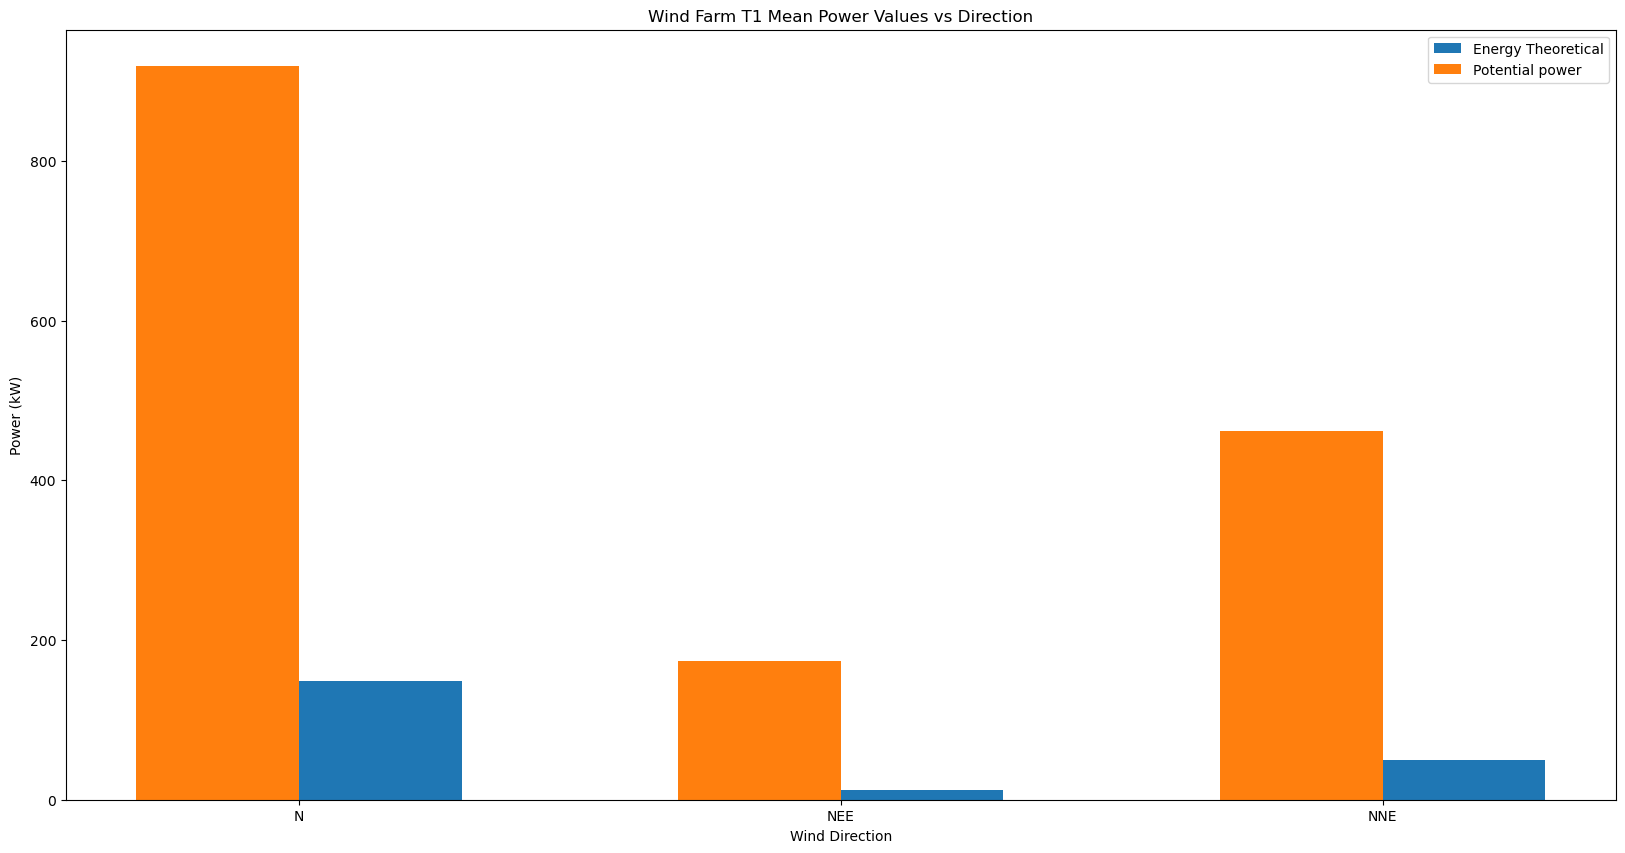

In [37]:
# mean powers according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(df_direction_summary["Direction"],df_direction_summary["Energy Theoretical (kWh)"],label="Energy Theoretical",align="edge",width=0.3)
    plt.bar(df_direction_summary["Direction"],df_direction_summary["Potential power reference turbines (kW)"],label="Potential power",align="edge",width=-0.3)
    plt.xlabel("Wind Direction")
    plt.ylabel("Power (kW)")
    plt.title("Wind Farm {} Mean Power Values vs Direction".format(turbine_no))
    plt.legend()
    plt.show()
bar_graph()

In [38]:
# creating summary direction total dataframe from direction data.
df_direction_total = df_direction_summary.copy()

# removing the unnecessary columns.
df_direction_total.drop(columns={"count", "Potential power reference turbines (kW)", "Energy Theoretical (kWh)", "Loss_Value(kW)", "Loss(%)"}, inplace=True)

# calculating the total values from direction data.
df_direction_total["Total_Generation(MWh)"] = df_direction_summary["Potential power reference turbines (kW)"] * df_direction_summary["count"] / 6000
df_direction_total["Theoretical_PC_Total_Generation(MWh)"] = df_direction_summary["Energy Theoretical (kWh)"] * df_direction_summary["count"] / 6000
df_direction_total["Total_Loss(MWh)"] = df_direction_total["Theoretical_PC_Total_Generation(MWh)"] - df_direction_total["Total_Generation(MWh)"]
df_direction_total["Loss(%)"] = df_direction_total["Total_Loss(MWh)"] / df_direction_total["Theoretical_PC_Total_Generation(MWh)"] * 100

# rounding the values to 2 digits
df_direction_total = df_direction_total.round({'Total_Generation(MWh)': 2, 'Theoretical_PC_Total_Generation(MWh)': 2,
                                                'Total_Loss(MWh)': 2, 'Loss(%)': 2})

# changing the place of columns.
df_direction_total = df_direction_total[["Direction", "Total_Generation(MWh)", "Theoretical_PC_Total_Generation(MWh)",
                                         "Total_Loss(MWh)", "Loss(%)"]]


In [39]:
df_direction_total

,Direction,Total_Generation(MWh),Theoretical_PC_Total_Generation(MWh),Total_Loss(MWh),Loss(%)
0,N,6336.43,1026.99,-5309.44,-516.99
1,NEE,0.06,0.00,-0.05,-1271.20
2,NNE,163.20,17.43,-145.77,-836.39


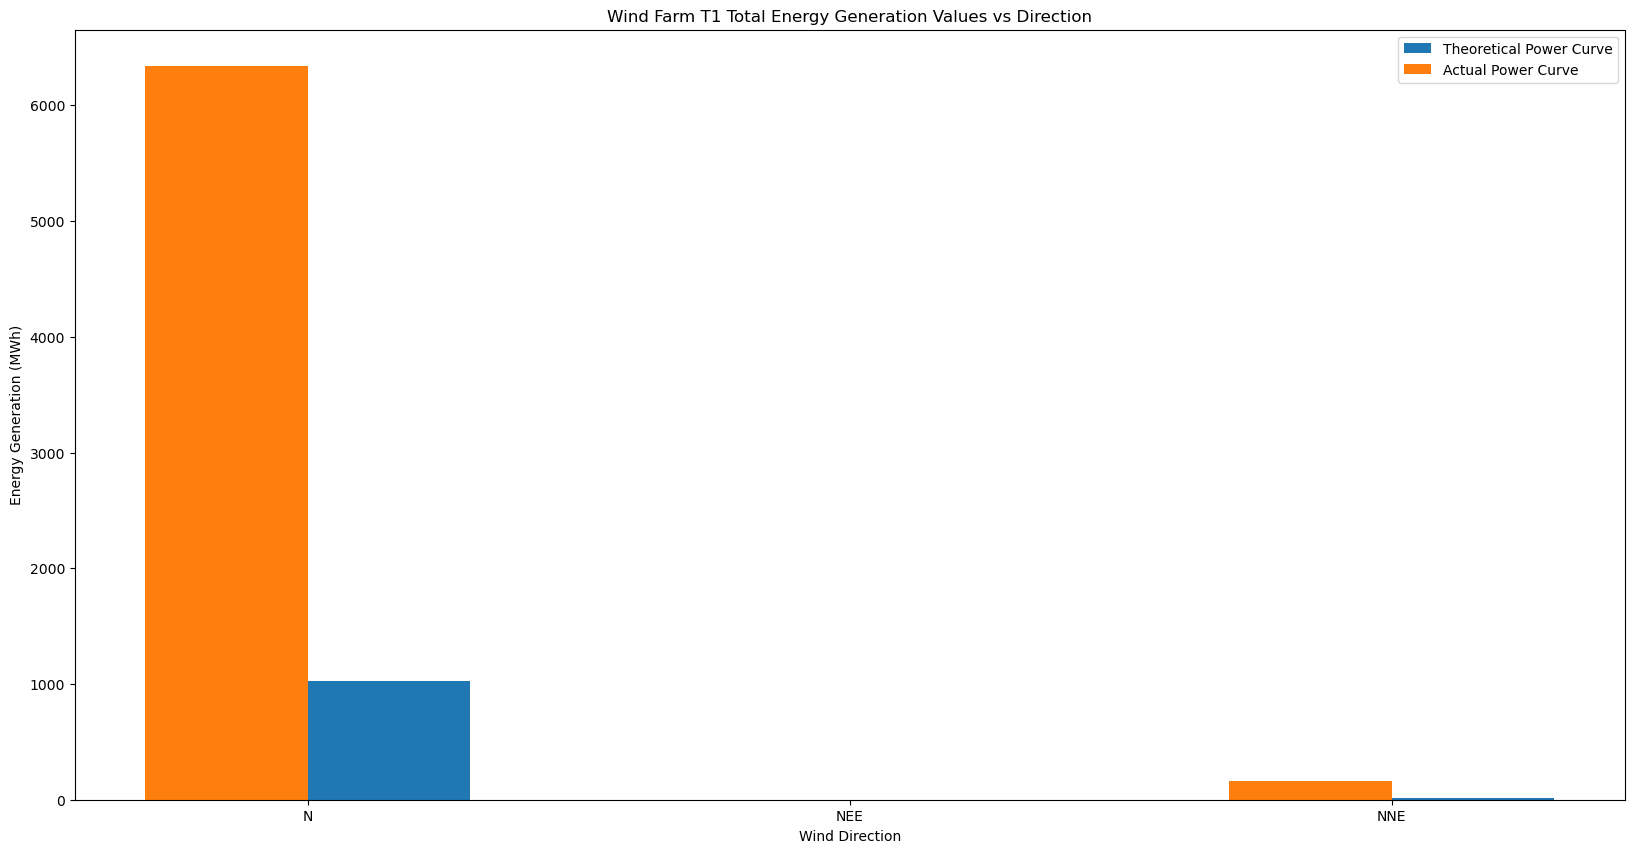

In [40]:
#Drawing graph of total generations according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(df_direction_total["Direction"],df_direction_total["Theoretical_PC_Total_Generation(MWh)"],label="Theoretical Power Curve",align="edge",width=0.3)
    plt.bar(df_direction_total["Direction"],df_direction_total["Total_Generation(MWh)"],label="Actual Power Curve",align="edge",width=-0.3)
    plt.xlabel("Wind Direction")
    plt.ylabel("Energy Generation (MWh)")
    plt.title("Wind Farm {} Total Energy Generation Values vs Direction".format(turbine_no))
    plt.legend()
    plt.show()
bar_graph()

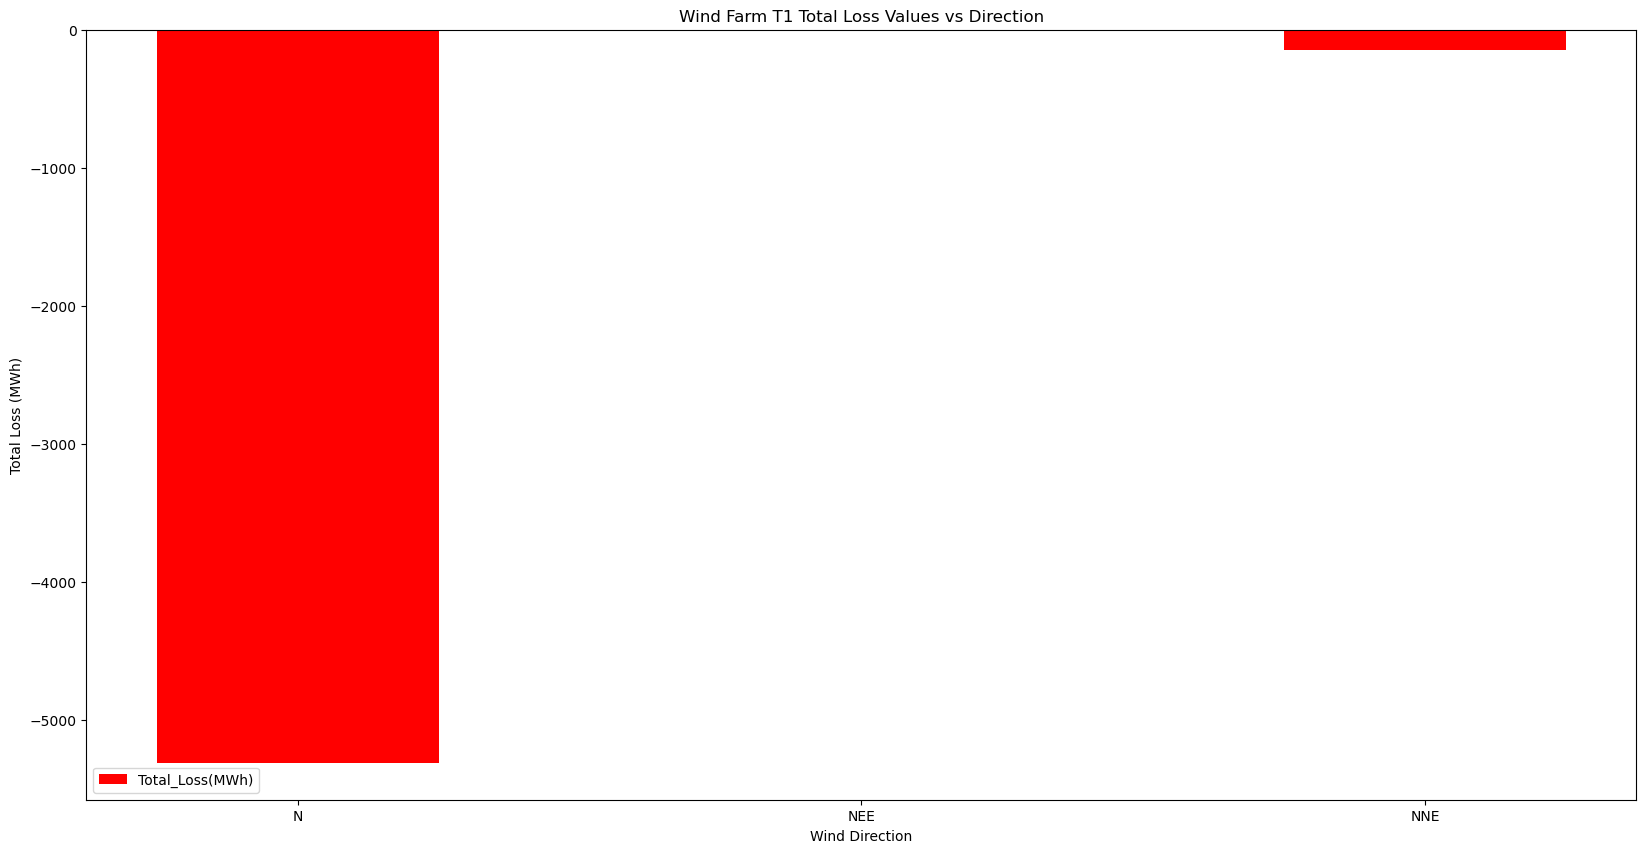

In [41]:
#Drawing graph of total loss according to wind direction.
def bar_graph():
    fig = plt.figure(figsize=(20,10))
    plt.bar(df_direction_total["Direction"],df_direction_total["Total_Loss(MWh)"],
            label="Total_Loss(MWh)",align="center",width=0.5, color="red",picker=5)
    plt.xlabel("Wind Direction")
    plt.ylabel("Total Loss (MWh)")
    plt.title("Wind Farm {} Total Loss Values vs Direction".format(turbine_no))
    plt.legend()
    plt.show()
bar_graph()

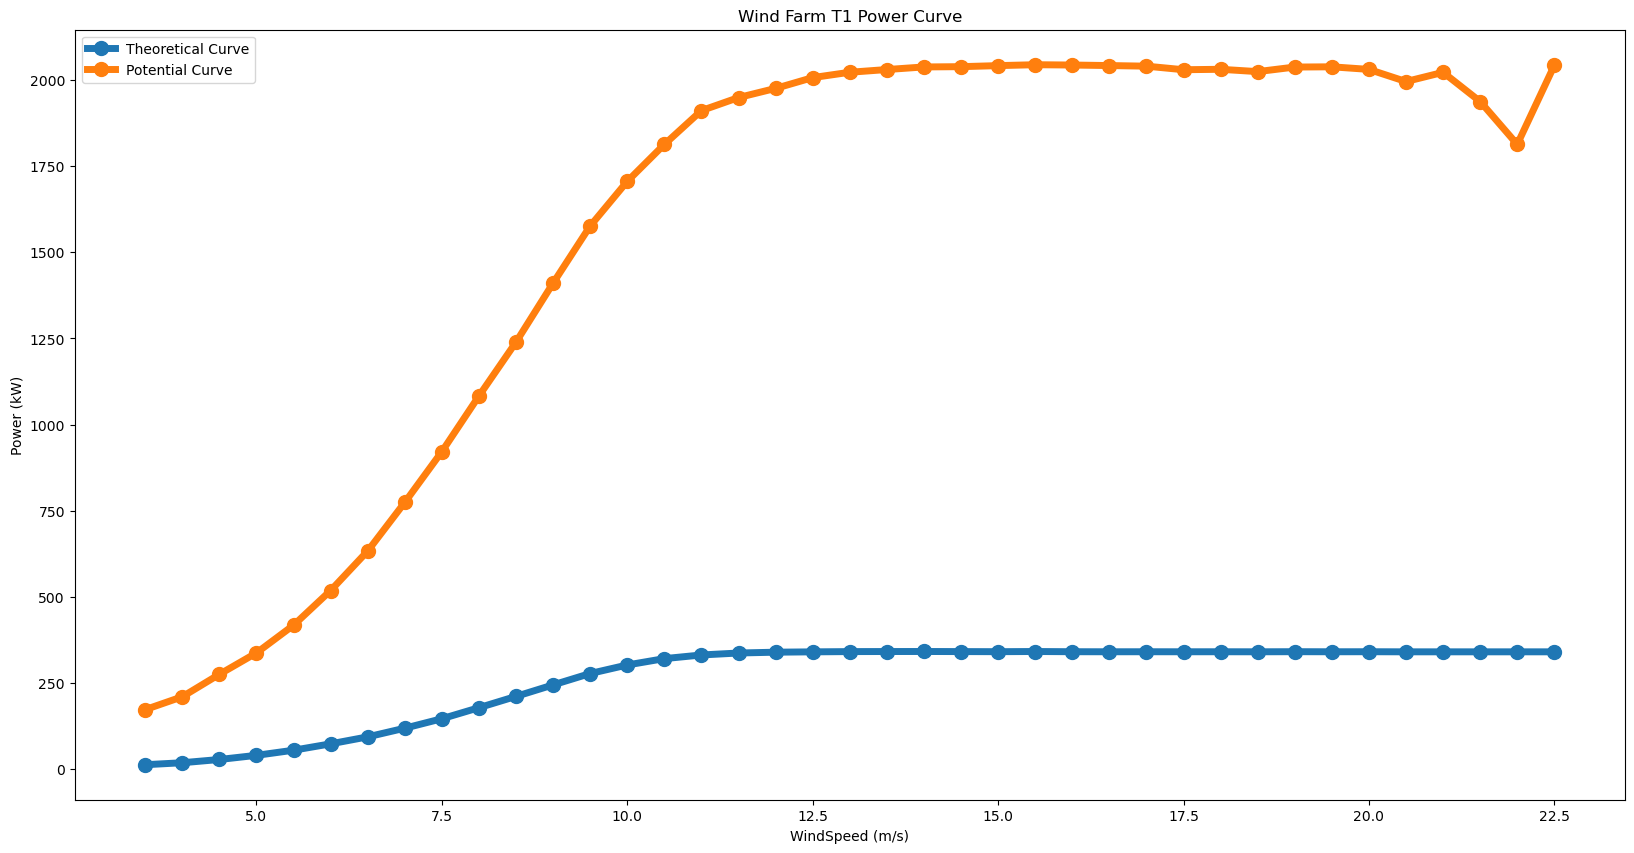

In [42]:
#power curve
def graph_WT():
    fig = plt.figure(figsize=(20,10))
    plt.plot(df_speed_summary["mean_WindSpeed"], df_speed_summary["Energy Theoretical (kWh)"], label="Theoretical Curve",
             marker="o", markersize=10, linewidth=5)
    plt.plot(df_speed_summary["mean_WindSpeed"], df_speed_summary["Potential power reference turbines (kW)"], label="Potential Curve",
             marker="o", markersize=10, linewidth=5)
    plt.xlabel("WindSpeed (m/s)")
    plt.ylabel("Power (kW)")
    plt.title("Wind Farm {} Power Curve".format(turbine_no))
    plt.legend()
    plt.show()
    fig.savefig("{}_Powercurve.png".format(turbine_no))
    plt.close(fig)

graph_WT()

In [43]:
print("df_speed_summary columns:", df_speed_summary.columns)
print("df_speed_summary columns:", df_speed_summary.columns)

df_speed_summary columns: Index(['mean_WindSpeed', 'Potential power reference turbines (kW)',
       'Energy Theoretical (kWh)', 'Loss_Value(kW)', 'Loss(%)', 'count'],
      dtype='object')
df_speed_summary columns: Index(['mean_WindSpeed', 'Potential power reference turbines (kW)',
       'Energy Theoretical (kWh)', 'Loss_Value(kW)', 'Loss(%)', 'count'],
      dtype='object')


In [44]:
print(df_clean["mean_WindSpeed"].unique())

[ 4.   4.5  6.   5.5  5.   3.5  7.   6.5  7.5  8.   8.5  9.   9.5 10.
 10.5 11.  11.5 12.  12.5 13.  13.5 14.5 15.  14.  16.  15.5 16.5 18.
 17.  20.  18.5 19.  19.5 20.5 21.5 21.  22.  17.5 22.5]


In [45]:
df_clean["mean_WindSpeed"] = pd.to_numeric(df_clean["mean_WindSpeed"], errors='coerce')

In [46]:
print(df_clean.dtypes)

# Date and time                          object
Wind speed (m/s)                        float64
Wind speed, Standard deviation (m/s)    float64
Wind speed, Minimum (m/s)               float64
Wind speed, Maximum (m/s)               float64
                                         ...   
mean_WindSpeed                          float64
mean_Direction                          float64
Direction                                object
Loss_Value(kW)                          float64
Loss(%)                                 float64
Length: 305, dtype: object


In [47]:
#direction
list_data = []
list_yon = ["N", "NNE", "NEE", "E", "SEE", "SSE", "S", "SSW", "SWW", "W", "NWW", "NNW"]

for i in range(0, 12):
    data1T_A = df_clean[df_clean["Direction"] == list_yon[i]]

    # 'mean_WindSpeed' to numeric
    data1T_A['mean_WindSpeed'] = pd.to_numeric(data1T_A['mean_WindSpeed'], errors='coerce')

    # Drop rows with NaN values in "mean_WindSpeed" column
    data1T_A = data1T_A.dropna(subset=["mean_WindSpeed"])

    DepGroup_A = data1T_A.groupby("mean_WindSpeed")
    data_T_A = DepGroup_A.agg({
        'Potential power reference turbines (kW)': 'mean',
        'Energy Theoretical (kWh)': 'mean',
        'Loss_Value(kW)': 'mean',
        'Loss(%)': 'mean'
    }).reset_index()

    data_T_A["count"] = data1T_A['mean_WindSpeed'].value_counts().sort_index().values

    data_T_A = data_T_A.round({
        'mean_WindSpeed': 1,
        'Potential power reference turbines (kW)': 2,
        'Energy Theoretical (kWh)': 2,
        'Loss_Value(kW)': 2,
        'Loss(%)': 2,
    })

    list_data.append(data_T_A)

# Access each summary dataframe using list indexing
data_T_N = list_data[0]
data_T_NNE = list_data[1]
data_T_NEE = list_data[2]
data_T_E = list_data[3]
data_T_SEE = list_data[4]
data_T_SSE = list_data[5]
data_T_S = list_data[6]
data_T_SSW = list_data[7]
data_T_SWW = list_data[8]
data_T_W = list_data[9]
data_T_NWW = list_data[10]
data_T_NNW = list_data[11]


C:\Users\vigne\AppData\Local\Temp\ipykernel_12292\1063855025.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1T_A['mean_WindSpeed'] = pd.to_numeric(data1T_A['mean_WindSpeed'], errors='coerce')
C:\Users\vigne\AppData\Local\Temp\ipykernel_12292\1063855025.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1T_A['mean_WindSpeed'] = pd.to_numeric(data1T_A['mean_WindSpeed'], errors='coerce')
C:\Users\vigne\AppData\Local\Temp\ipykernel_12292\1063855025.py:10: SettingWithCopyWarning: 
A value is tryi

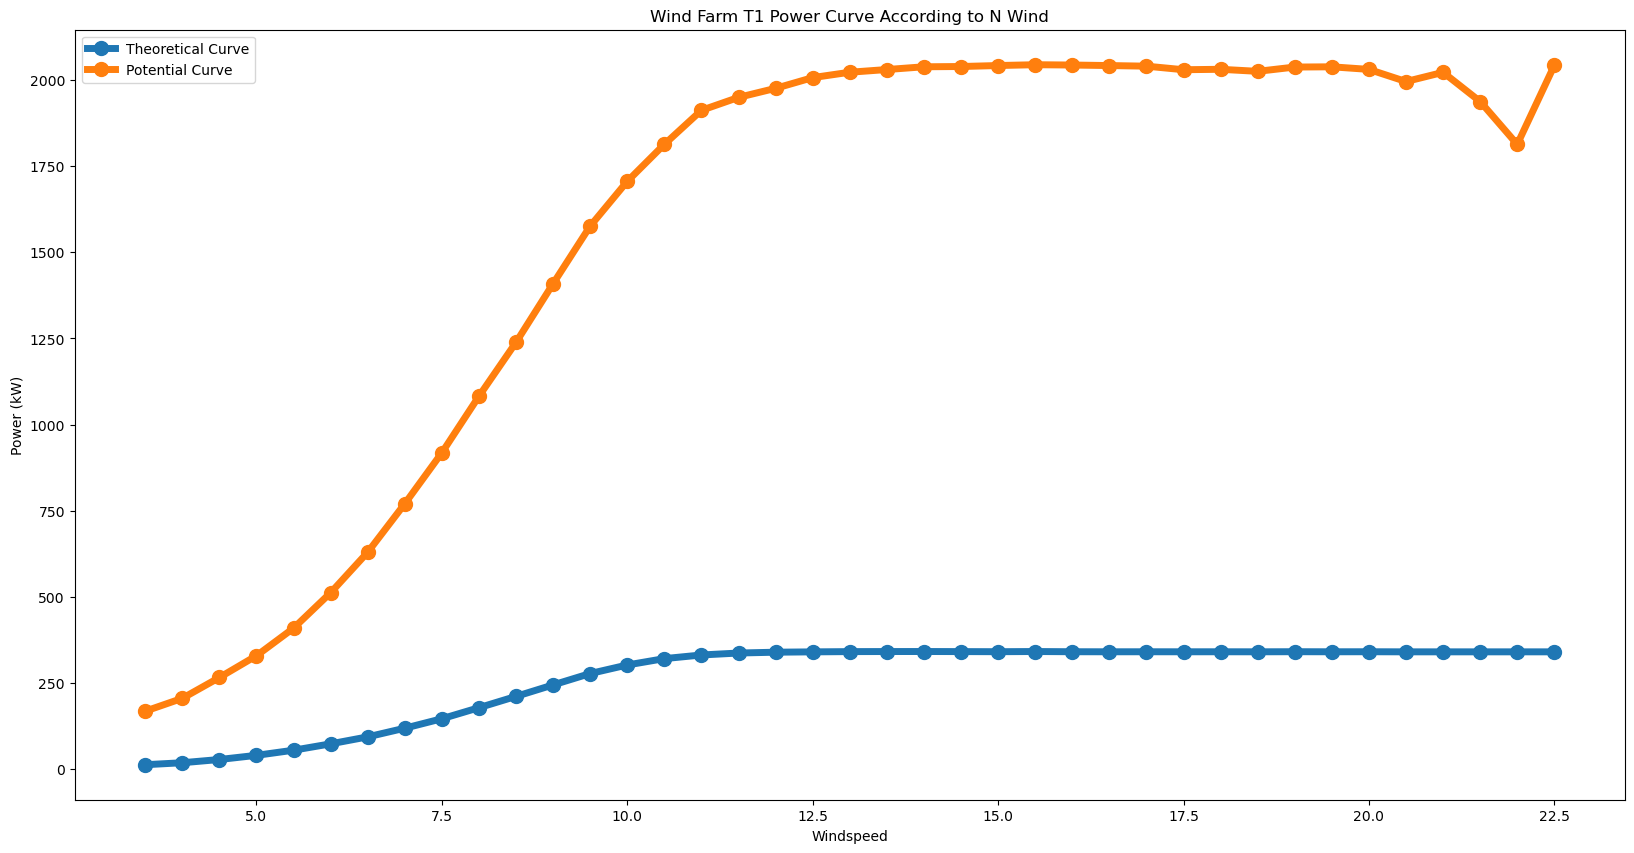

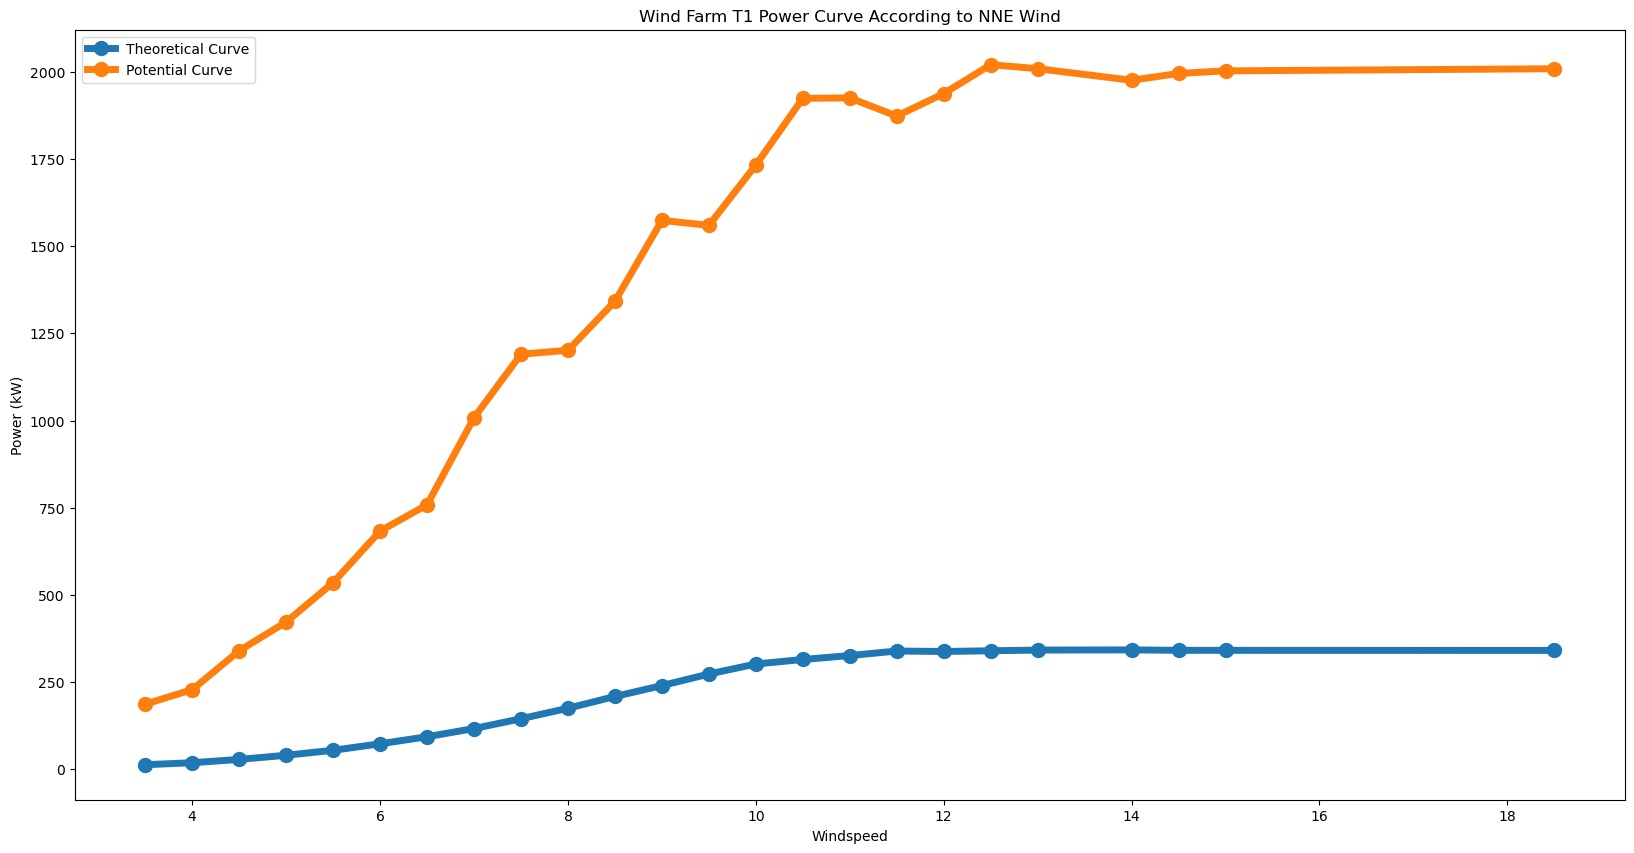

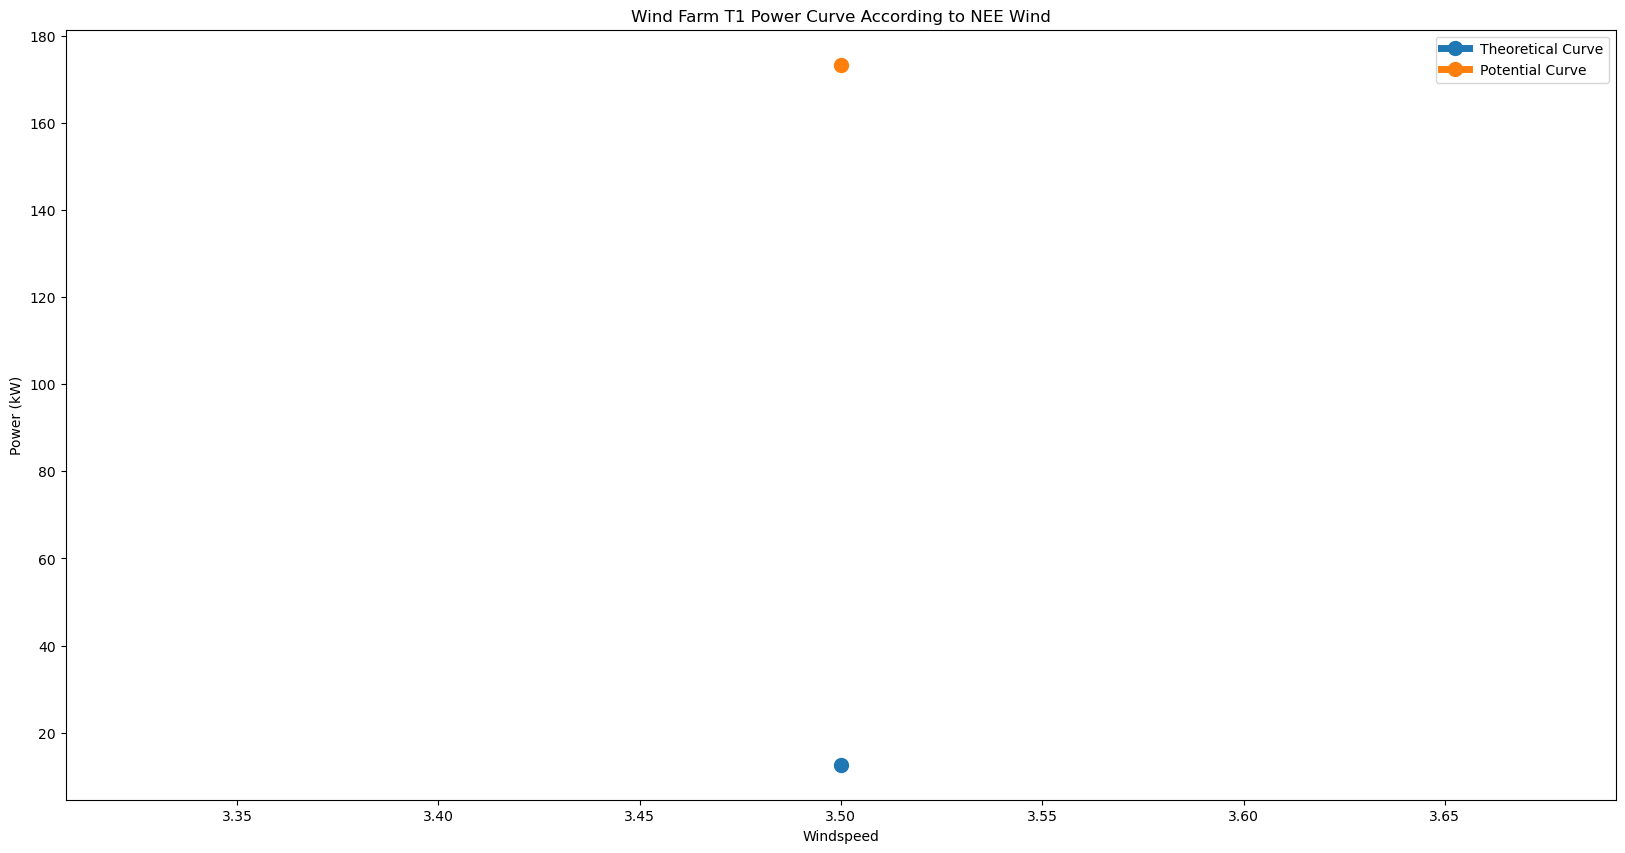

In [48]:
#power curves for direction
list_table = [data_T_N, data_T_NNE, data_T_NEE]
list_tableName = ["N", "NNE", "NEE"]

def graph_T(i):
    fig = plt.figure(figsize=(20, 10))
    plt.plot(list_table[i]["mean_WindSpeed"], list_table[i]["Energy Theoretical (kWh)"], label="Theoretical Curve",
             marker="o", markersize=10, linewidth=5)
    plt.plot(list_table[i]["mean_WindSpeed"], list_table[i]["Potential power reference turbines (kW)"],
             label="Potential Curve", marker="o", markersize=10, linewidth=5)
    plt.xlabel("Windspeed")
    plt.ylabel("Power (kW)")
    plt.title("Wind Farm {} Power Curve According to {} Wind".format(turbine_no, list_tableName[i]))
    plt.legend()
    plt.show()
    fig.savefig("{}_{}_Powercurve.jpeg".format(turbine_no, list_tableName[i]))
    plt.close(fig)

for i in range(0, 3): 
    graph_T(i)

C:\Users\vigne\AppData\Local\Temp\ipykernel_17652\1785105300.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.iloc[:,i+1], shade=True)
C:\Users\vigne\AppData\Local\Temp\ipykernel_17652\1785105300.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.iloc[:,i+1], shade=True)
C:\Users\vigne\AppData\Local\Temp\ipykernel_17652\1785105300.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.iloc[:,i+1], shade=True)
C:\Users\vigne\AppData\Local\Temp\ipykernel_17652\1785105300.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please u

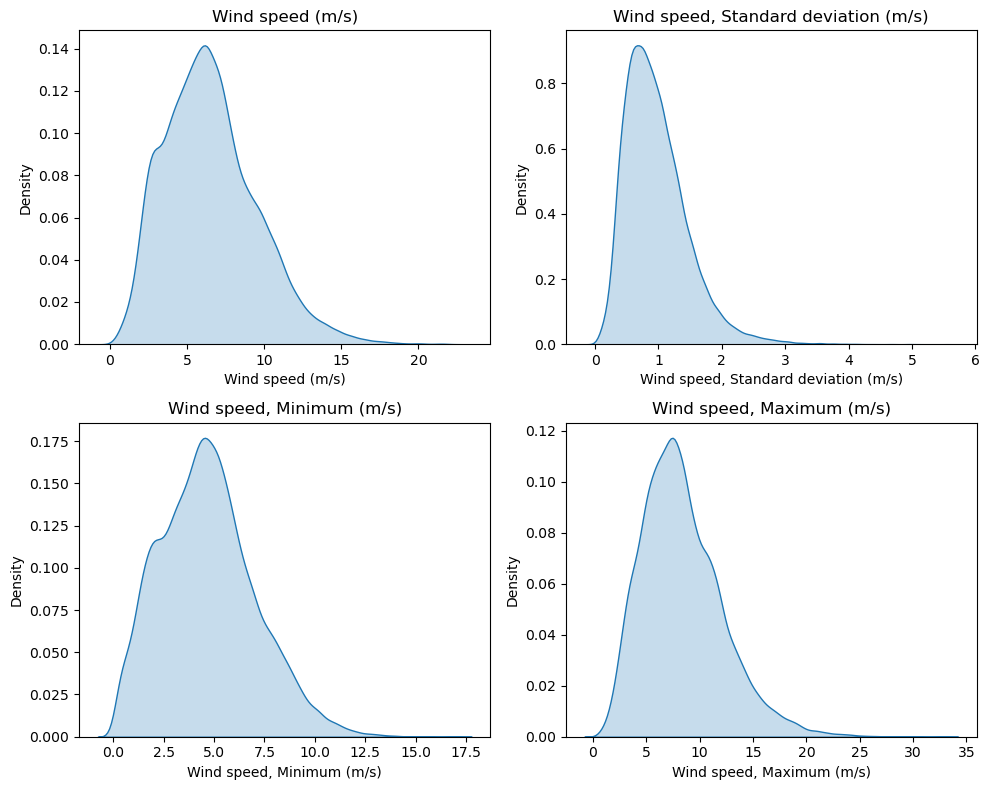

In [74]:
#plotting the data distribution
plt.figure(figsize=(10, 8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(df.iloc[:,i+1], shade=True)
    plt.title(df.columns[i+1])
plt.tight_layout()
plt.show()

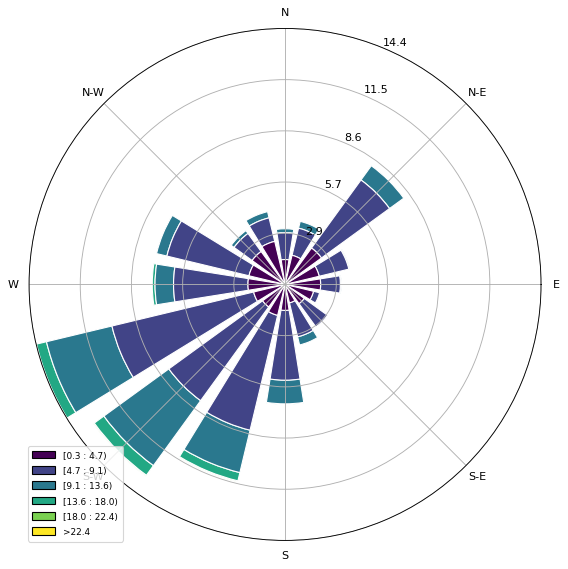

In [78]:
ax = WindroseAxes.from_ax()
ax.bar(df['Wind direction (°)'], df['Wind speed (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

# ENERGY

In [79]:
import datetime
import time

In [80]:
dataframe=pd.read_csv('Turbine_Data_Kelmarsh_1.csv', skiprows=9)
dataframe.head()

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
0,2020-01-01 00:00:00,3.887291,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,2.894442,5.923776,...,30.390030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01 00:10:00,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,3.387660,5.713417,...,32.042564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 00:20:00,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,3.305274,6.688592,...,32.799056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01 00:30:00,3.330342,0.689929,1.541864,4.689322,7.1,3.584192,0.524914,2.547872,4.671783,...,36.129912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01 00:40:00,3.388536,0.897104,1.832924,5.210185,7.1,3.668500,0.885085,1.908008,5.278419,...,26.667582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
dataframe.rename(columns={'Energy Theoretical (kWh)':'Energy','Potential power reference turbines (kW)':'Potential Power',"Wind Speed (m/s)":"WindSpeed","Wind Direction (°)":"WindDirection"},
                inplace=True)
dataframe.head()

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,Tower Acceleration y (mm/ss),"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)"
0,2020-01-01 00:00:00,3.887291,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,2.894442,5.923776,...,30.390030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01 00:10:00,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,3.387660,5.713417,...,32.042564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01 00:20:00,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,3.305274,6.688592,...,32.799056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01 00:30:00,3.330342,0.689929,1.541864,4.689322,7.1,3.584192,0.524914,2.547872,4.671783,...,36.129912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01 00:40:00,3.388536,0.897104,1.832924,5.210185,7.1,3.668500,0.885085,1.908008,5.278419,...,26.667582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
from datetime import datetime
dataframe['Time'] = dataframe['# Date and time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S").minute)
dataframe.head()

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,"Tower Acceleration X, Min (mm/ss)","Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)",Time
0,2020-01-01 00:00:00,3.887291,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,2.894442,5.923776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2020-01-01 00:10:00,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,3.387660,5.713417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
2,2020-01-01 00:20:00,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,3.305274,6.688592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
3,2020-01-01 00:30:00,3.330342,0.689929,1.541864,4.689322,7.1,3.584192,0.524914,2.547872,4.671783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
4,2020-01-01 00:40:00,3.388536,0.897104,1.832924,5.210185,7.1,3.668500,0.885085,1.908008,5.278419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40


In [90]:
temp=dataframe['Time'][1:].values - dataframe['Time'][0:-1].values
temp=np.array([0]+list(temp))

In [91]:
dataframe['Time'][1:].values 

array([10, 20, 30, ..., 30, 40, 50], dtype=int64)

In [92]:
dataframe['Time'][0:-1].values

array([ 0, 10, 20, ..., 20, 30, 40], dtype=int64)

In [94]:
dataframe['TimeDiff']=temp

In [95]:
dataframe.tail()

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,"Tower Acceleration X, Max (mm/ss)","Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)",Time,TimeDiff
52699,2020-12-31 23:10:00,5.119444,0.138374,4.902000,5.34450,7.0,4.815071,0.172836,4.544675,5.144063,...,9.191845,1.356082,8.504202,4.037867,4.037867,0.0,1.996142,2.033033,10,10
52700,2020-12-31 23:20:00,5.009681,0.145155,4.666500,5.30025,7.0,4.759028,0.192205,4.351247,5.136302,...,8.505324,1.326892,9.036353,4.049649,4.049649,0.0,2.148482,1.780293,20,10
52701,2020-12-31 23:30:00,5.060813,0.089126,4.891875,5.25000,7.0,4.825727,0.199880,4.456916,5.103168,...,8.629942,1.569391,9.103714,4.014544,4.014544,0.0,1.604888,1.733586,30,10
52702,2020-12-31 23:40:00,4.814269,0.278785,4.128750,5.16450,7.0,4.740983,0.149325,4.372440,4.985261,...,10.369538,1.847816,9.026249,4.050445,4.050445,0.0,1.963136,1.998647,40,10
52703,2020-12-31 23:50:00,5.477400,0.491953,4.857000,6.25275,7.0,5.312566,0.519031,4.619896,6.299855,...,11.319327,1.326892,12.754678,4.028503,4.028503,0.0,2.699121,2.468272,50,10


In [108]:
dataframe['Gust']=np.array([0]+list(dataframe['Wind speed (m/s)'][1:].values-dataframe['Wind speed (m/s)'][:-1].values))
dataframe.head()

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,"Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)",Time,TimeDiff,Gust
0,2020-01-01 00:00:00,3.887291,0.646663,2.629255,5.138163,7.1,4.390778,0.595037,2.894442,5.923776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.000000
1,2020-01-01 00:10:00,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,3.387660,5.713417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,10,-0.038350
2,2020-01-01 00:20:00,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,3.305274,6.688592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,10,0.194683
3,2020-01-01 00:30:00,3.330342,0.689929,1.541864,4.689322,7.1,3.584192,0.524914,2.547872,4.671783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,10,-0.713283
4,2020-01-01 00:40:00,3.388536,0.897104,1.832924,5.210185,7.1,3.668500,0.885085,1.908008,5.278419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,10,0.058193


In [109]:
dataframe['Wind speed (m/s)'][1:].values

array([3.84894128, 4.04362473, 3.3303421 , ..., 5.06081259, 4.81426888,
       5.47740011])

In [110]:
dataframe['Wind speed (m/s)'][:-1].values

array([3.88729135, 3.84894128, 4.04362473, ..., 5.00968139, 5.06081259,
       4.81426888])

In [111]:
dataframe.dtypes

# Date and time                          object
Wind speed (m/s)                        float64
Wind speed, Standard deviation (m/s)    float64
Wind speed, Minimum (m/s)               float64
Wind speed, Maximum (m/s)               float64
                                         ...   
Tower Acceleration X, StdDev (mm/ss)    float64
Tower Acceleration Y, StdDev (mm/ss)    float64
Time                                      int64
TimeDiff                                  int64
Gust                                    float64
Length: 302, dtype: object

In [112]:
dataframe_=dataframe[dataframe['TimeDiff'].isin([10,-50])]
dataframe_.head()

,# Date and time,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",...,"Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)",Time,TimeDiff,Gust
1,2020-01-01 00:10:00,3.848941,0.787454,2.456995,5.551735,7.1,4.216298,0.686900,3.387660,5.713417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,10,-0.038350
2,2020-01-01 00:20:00,4.043625,0.983279,2.726894,6.251913,7.1,4.323125,1.053373,3.305274,6.688592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,10,0.194683
3,2020-01-01 00:30:00,3.330342,0.689929,1.541864,4.689322,7.1,3.584192,0.524914,2.547872,4.671783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,10,-0.713283
4,2020-01-01 00:40:00,3.388536,0.897104,1.832924,5.210185,7.1,3.668500,0.885085,1.908008,5.278419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,10,0.058193
5,2020-01-01 00:50:00,4.706282,0.970272,2.679744,6.726741,7.1,5.071557,0.977931,3.323673,6.665799,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,10,1.317746


In [113]:
len(dataframe_)

52703

In [114]:
dataframe_=dataframe_[dataframe_['Power (kW)']>=0]
dataframe_.describe()

,Wind speed (m/s),"Wind speed, Standard deviation (m/s)","Wind speed, Minimum (m/s)","Wind speed, Maximum (m/s)",Long Term Wind (m/s),Wind speed Sensor 1 (m/s),"Wind speed Sensor 1, Standard deviation (m/s)","Wind speed Sensor 1, Minimum (m/s)","Wind speed Sensor 1, Maximum (m/s)",Wind speed Sensor 2 (m/s),...,"Tower Acceleration Y, Min (mm/ss)","Tower Acceleration Y, Max (mm/ss)","Drive train acceleration, Max (mm/ss)","Drive train acceleration, Min (mm/ss)","Drive train acceleration, StdDev (mm/ss)","Tower Acceleration X, StdDev (mm/ss)","Tower Acceleration Y, StdDev (mm/ss)",Time,TimeDiff,Gust
count,46903.000000,46697.000000,46697.000000,46697.000000,46903.000000,46902.000000,46696.000000,46694.000000,46696.000000,46903.000000,...,43321.000000,43321.000000,43315.000000,43315.000000,43315.000000,43321.000000,43321.000000,46903.000000,46903.000000,46880.000000
mean,6.961869,1.012484,5.004877,8.868766,6.145664,7.455172,0.941066,5.668009,9.239440,6.962241,...,9.885866,67.034354,9.549924,9.549754,0.000085,31.406636,15.129495,24.983477,0.001492,0.003875
std,2.782840,0.482336,2.184353,3.534304,0.675089,2.882030,0.448714,2.351707,3.561967,2.782051,...,6.024045,38.231840,4.989043,4.988941,0.008581,14.355781,8.797849,17.072140,22.359583,0.744392
min,1.016251,0.000000,0.128250,1.016251,5.200000,1.167523,0.000000,0.000000,1.479677,0.960750,...,1.145105,5.521234,3.013570,3.013570,0.000000,0.000000,0.000000,0.000000,-50.000000,-6.021824
25%,4.886752,0.657915,3.416676,6.247829,5.700000,5.300897,0.611394,3.956124,6.578264,4.882009,...,5.725569,41.442024,5.395440,5.395190,0.000000,21.689276,9.307898,10.000000,10.000000,-0.420069
50%,6.556338,0.930487,4.791044,8.251094,6.400000,7.037036,0.882058,5.415591,8.648829,6.565322,...,8.339743,58.953625,7.946474,7.946474,0.000000,29.866759,13.266479,20.000000,10.000000,0.001968
75%,8.613434,1.265848,6.309827,10.886227,6.900000,9.225322,1.190723,7.059741,11.369627,8.605739,...,12.438087,82.396927,13.249961,13.249961,0.000000,39.468748,18.656189,40.000000,10.000000,0.421771
max,21.831159,5.559541,16.977695,32.929501,7.100000,22.280331,4.729107,16.625269,32.492931,21.799200,...,70.095688,610.804321,33.621243,33.621243,1.035189,171.593130,149.792304,50.000000,10.000000,5.581321


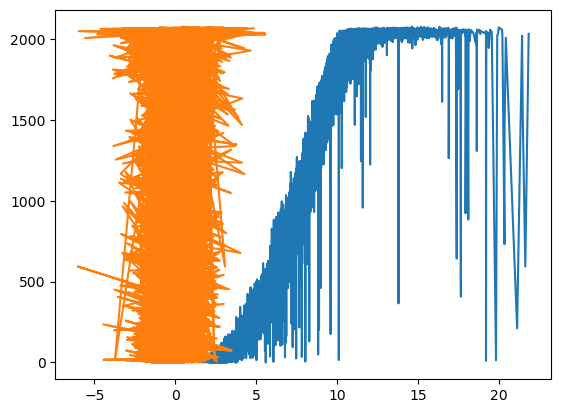

In [115]:
x=dataframe_.sort_values(by='Wind speed (m/s)')['Wind speed (m/s)']
y=dataframe_.sort_values(by='Wind speed (m/s)')['Power (kW)']
z=dataframe_.sort_values(by='Wind speed (m/s)')['Gust']

plt.plot(x,y)
plt.plot(z,y)